In [1]:
# 多項分布ナイーブベイズによるテキストの分類

In [5]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix

In [7]:
# 20個のニュースカテゴリからなるデータをロードする
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [9]:
# 対象のカテゴリを絞る
categories = ['talk.politics.misc', 'soc.religion.christian', 
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test  = fetch_20newsgroups(subset='test' , categories=categories)

In [32]:
len(train.data), len(test.data)

(2241, 1491)

In [10]:
# データのサンプルをひとつ取って中身を確認する
print(train.data[42])

From: kennejs@a.cs.okstate.edu (KENNEDY JAMES SCOT)
Subject: We're winning the war on drugs.  Not!
Organization: Oklahoma State University, Computer Science, Stillwater
Keywords: drugs DEA WOD legalization
Lines: 140

The DEA and other organizations would have the American people
believe that we are winning the "war on drugs".  I'm going to
dispel the propaganda that the DEA is putting out by showing
you the drug war's *real* status. To help prove my assertions
I've also posted two articles from USA Today that clearly
demonstrate that drug use among certain age groups *is* on the
rise.  If WOD is working, as we're led to believe, then drug
abuse should have gone down substantially by now.  The reality
is, is that it has not gone down very much.  If anything,
substance abuse is on the rise.  I'm also going to supply a
possible solution to this problem.

The following text is an excerpt from an article about rock music
and pot entitled "Hello Again, Mary Jane" which appears in the
curren

In [11]:
# TF-IDFベクトル化器を使用して、テキストデータを数値のベクトルに変換する
# TF-IDFベクトル化器から多項分布ナイーブベイズへのパイプラインを作成する
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [12]:
# 機械学習を実行する
model.fit(train.data, train.target)
labels = model.predict(test.data)

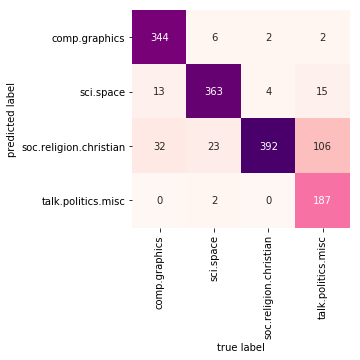

In [16]:
# 学習結果をヒートマップで表示する
mat = confusion_matrix(test.target, labels)
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=train.target_names, yticklabels=train.target_names, cmap='RdPu')
plt.xlabel('true label')
plt.ylabel('predicted label');

In [17]:
# 任意の文字列を評価する
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [18]:
predict_category('sending a payload to the ISS')

'sci.space'

In [19]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [20]:
predict_category('determining the screen resolution')

'comp.graphics'

In [22]:
predict_category('I like the Earth')

'sci.space'